# DogFaceNet: test file with MNIST dataset

### Imports

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

import os
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
SIZE = (28,28)

### Dataset preprocessing
- Get the dataset from folders
- Associate the corresponding classes
- Resized the dataset
- Shuffle the dataset?
- Divide the dataset into validation, training and testing?

In [4]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# x_train -= 127.5
# x_test -= 127.5
# x_train *= 1./128
# x_test *= 1./128
x_train /= 255
x_test /= 255

#### New method
- We divide the validation and test set from the training set with the classic division method: 85 percent training, 10 validating, 5 testing.
- We then computes pairs of images in the validation set and testing set:
 - Some of these pairs are images of the same dog and some are picture of different dogs
 - We create a two lists:
  - A list a images containing the pairs: two successive images are a pair of images. For example, image 0 and is a pair, image 2 and 3 is another pair, etc...
  - A list of boolean called 'issame' indicating if a pair is a pair of images of the same dog or a pair of different dogs. For example, if image 0 and image 1 are showing the same dog value 0 and 1 in the list will be True. On the other hand if the image 2 and 3 represent two different dogs the value 2 and 3 in the list will be at False

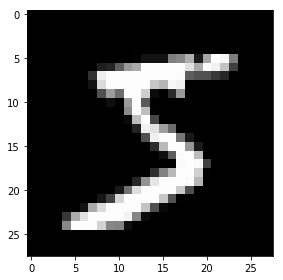

In [5]:
sk.io.imshow(x_train[0])

In [5]:
w, h = SIZE

images_valid = x_test
labels_valid = y_test

images_train = x_train
labels_train = y_train

print("Number of validation images: " + str(len(labels_valid)))
print("Number of training images: " + str(len(labels_train)))
print("Number of classes in the training set: " + str(max(labels_train) - min(labels_train)+1))


# Creates the pairs

nbof_pairs = (len(images_valid)//2)*2 # it has to be multiple of 2

print("Number of pairs: " + str(nbof_pairs))

pairs = np.empty((nbof_pairs,w,h))
issame = np.empty(nbof_pairs, dtype=int)
y_pairs = np.empty(nbof_pairs)

nbof_same = 0

for i in range(0,nbof_pairs,2):
    ## alea_issame will decide if the new pair will be a pair of same dog images or a pair of different
    alea_issame = np.random.rand()

    if alea_issame < 0.5: # Then it will be a pair of same dogs
        # we randomly choose a dog
        choice = np.random.randint(len(labels_valid))
        
        # we extract the images of this class
        chosen_images = list(images_valid[np.equal(labels_valid,labels_valid[choice])])
        chosen_labels = list(labels_valid[np.equal(labels_valid,labels_valid[choice])])
        
        while len(labels_valid[np.equal(labels_valid,labels_valid[choice])]) < 2:
            choice = np.random.randint(len(labels_valid))
            chosen_images = list(images_valid[np.equal(labels_valid,labels_valid[choice])])
            chosen_labels = list(labels_valid[np.equal(labels_valid,labels_valid[choice])])
            
        # we then randomly choose two pictures of this class
        choice1 = np.random.randint(len(chosen_images))
        pairs[i] = chosen_images[choice1]
        y_pairs[i] = chosen_labels[choice1]
        
        save = np.copy(chosen_images)
        chosen_images = chosen_images[:choice1] + chosen_images[choice1+1:]
        if len(chosen_images) == 0:
            print("Bug!")
            print(save)
        choice2 = np.random.randint(len(chosen_images))
        pairs[i+1] = chosen_images[choice2]
        y_pairs[i+1] = chosen_labels[choice2]
        
        issame[i] = issame[i+1] = 1
        
        nbof_same += 1
        
    else: # Then it will be a pair of different dogs
        # we randomly choose two dogs
        choice1 = np.random.randint(len(labels_valid))
        
        # we extract the images of the class
        chosen_images = list(images_valid[np.equal(labels_valid,labels_valid[choice1])])
        
        # we choose an image of this class
        choice = np.random.randint(len(chosen_images))
        #print(choice)
        pairs[i] = images_valid[choice]
        y_pairs[i] = labels_valid[choice]
        
        choice2 = np.random.randint(len(labels_valid))
        
        # check if we have two different classes
        while labels_valid[choice2] == labels_valid[choice1]:
            choice2 = np.random.randint(len(labels_valid))
        
        chosen_images = list(images_valid[np.equal(labels_valid,labels_valid[choice2])])
        
        # we choose an image of this class
        choice = np.random.randint(len(chosen_images))
        
        pairs[i+1] = images_valid[choice]
        y_pairs[i+1] = labels_valid[choice]
        
        issame[i] = issame[i+1] = 0

print("Number of same images: " + str(nbof_same))
print("Number of validation images: " + str(len(labels_valid)))

Number of validation images: 10000
Number of training images: 60000
Number of classes in the training set: 10
Number of pairs: 10000
Number of same images: 2559
Number of validation images: 10000


[1 1 0 0 0 0 0 0 1 1]
[2. 2. 9. 1. 2. 4. 1. 9. 8. 8.]


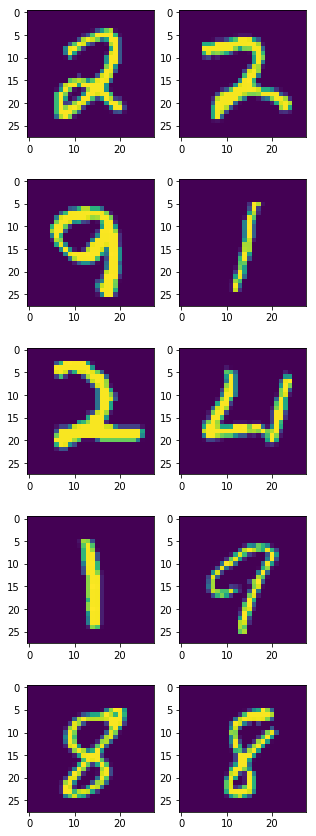

In [6]:
# check the pairs
s = 0
n = 5
print(issame[2*s:(n+s)*2])
print(y_pairs[2*s:(n+s)*2])
fig = plt.figure(figsize=(5,3*n))
for i in range(s,s+n):
    plt.subplot(n,2,2*(i-s)+1)
    plt.imshow(pairs[2*i])
    plt.subplot(n,2,2*(i-s)+2)
    plt.imshow(pairs[2*i+1])

In [6]:
x_train = np.expand_dims(x_train, -1)
print(x_train.shape)
pairs = np.expand_dims(pairs, -1)
print(pairs.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_pairs = tf.keras.utils.to_categorical(y_pairs)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
issame_train = np.ones(len(x_train))

In [10]:
# Verify shapes
# Train inputs
print("Train input shapes: ")
print(images_train.shape)
print(labels_train.shape)
print(issame_train_in.shape)

print("Train output shape: ")
print(labels_train.shape)
print(issame_train_out.shape)

print("Valid input shape: ")
print(pairs.shape)
print(labels_valid.shape)
print(issame_in.shape)

print("Valid output shape: ")
print(labels_valid.shape)

Train input shapes: 
(60000, 28, 28, 1)
(60000,)
(60000,)
Train output shape: 
(60000,)
(60000, 2)
Valid input shape: 
(10000, 28, 28, 1)
(10000,)
(10000,)
Valid output shape: 
(10000,)


### Define the model
- Define the ArcFace layer
- Define the dummy model first
- Compile it with the softmax loss and and Adam optimizer
- Then use transfer learning with a more complex model

Define the Arcface layer

In [9]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
import math

# Arcface should only be used for training
class Arcface(Layer):

    def __init__(self, out_num, s = 64., m = 0.5, **kwargs):
        self.out_num = out_num
        self.s = s
        self.m = m
        super(Arcface, self).__init__(**kwargs)

    def build(self, input_shape, initializer='uniform'):
        assert isinstance(input_shape, list)
        
        shape = tf.TensorShape((input_shape[0][-1],self.out_num))
        print(shape)
        
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel',
                                                 shape=shape,
                                                 initializer=initializer,
                                                 dtype=tf.float32,
                                                 trainable=True)
        super(Arcface, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x, training=None):
        assert isinstance(x, list)
        emb, labels = x
        #labels_sq = tf.squeeze(labels,1)
        #labels_sq = tf.reshape(labels,[None])
        #labels_int = tf.cast(labels_sq,tf.int32, name='labels_int')
        #print(labels_int.shape)
        #mask = tf.one_hot(labels_int, depth=self.out_num, name='one_hot_mask')
        mask = labels
        #mask = tf.squeeze(mask,1)
        #print(mask.shape)
        #mask_shape = mask.shape.as_list()
        #mask = tf.reshape(mask, (None,mask_shape[-1]))
        #print(mask.shape)
        def train_output():
            cos_m = math.cos(self.m)
            sin_m = math.sin(self.m)
            mm = sin_m * self.m  # issue 1
            threshold = math.cos(math.pi - self.m)

            # inputs and weights norm
            embedding_norm = tf.norm(emb, axis=1, keepdims=True)
            embedding = tf.div(emb, embedding_norm, name='norm_embedding')

            weights_norm = tf.norm(self.kernel, axis=0, keepdims=True)
            weights = tf.div(self.kernel, weights_norm, name='norm_weights')
            # cos(theta+m)
            cos_t = tf.matmul(embedding, weights, name='cos_t')
            print(cos_t.shape)
            cos_t2 = tf.square(cos_t, name='cos_2')
            sin_t2 = tf.subtract(1., cos_t2, name='sin_2')
            sin_t = tf.sqrt(sin_t2, name='sin_t')
            cos_mt = self.s * tf.subtract(tf.multiply(cos_t, cos_m), tf.multiply(sin_t, sin_m), name='cos_mt')

            # this condition controls the theta+m should be in range [0, pi]
            #      0<=theta+m<=pi
            #     -m<=theta<=pi-m
            cond_v = cos_t - threshold
            cond = tf.cast(tf.nn.relu(cond_v, name='if_else'), dtype=tf.bool)

            keep_val = self.s*(cos_t - mm)
            cos_mt_temp = tf.where(cond, cos_mt, keep_val)

            
            # mask = tf.squeeze(mask, 1)
            inv_mask = tf.subtract(1., mask, name='inverse_mask')

            s_cos_t = tf.multiply(self.s, cos_t, name='scalar_cos_t')
            mul1 = tf.multiply(s_cos_t, inv_mask)
            print(mul1.shape)
            mul2 = tf.multiply(cos_mt_temp, mask)
            print(mul2.shape)
            output = tf.add(mul1, mul2, name='arcface_loss_output')
            print(output.shape)
            print(cos_mt_temp.shape)
            
            return output
        
        def valid_output():
            return mask
        
        return K.in_train_phase(train_output,valid_output,training=training)

    def compute_output_shape(self, input_shape):
        assert isinstance(input_shape, list)
        shape_emb, shape_lab = input_shape
        shape_emb[-1] = self.out_num
        return tf.TensorShape(shape_emb)

Define the validation layer:
- The bigger the validation batch the better it is (no less than 64 pictures -> 32 pairs)
- It computes the ROC curve
- Finds the best threshold
- Returns a list of 2D vectors [1,0] if the pair was the same dog, [0,1] if it was a different dog

In [27]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

# Should only be used for validating
class Validation(Layer):

    def __init__(self, **kwargs):
        super(Validation, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        self.emb_shape = input_shape[0]
        super(Validation, self).build(input_shape)

    def call(self, x, training=None):
        """
        Inputs: a tuple containing the embeddings and the issame list
        - embeddings: shape=(batch_size, embedding_size), type=float
        - issame: shape=(batch_size), type=bool
        
        Outputs: a tensor of shape=(batch_size,2), the ouput is either [1,0] (is same) or [0,1] (is different)
        """
        assert isinstance(x, list)
        
        embeddings, iss = x
        
        
        
        def train_output():
            return iss
        
        def valid_output():
            issame = tf.squeeze(iss)
            #self.emb_shape = embeddings.shape
            emb = tf.math.l2_normalize(embeddings,0)
            # emb contains a list of pictures
            # pictures with an even index are first pictures of the pairs
            # pictures with an odd index are second pictures of the pairs
            emb1 = embeddings[0::2]
            emb2 = embeddings[1::2]
            #emb1, emb2 = tf.split(embeddings, [32,32],0)
            
          # Compute the distance for each pair of vector
            dist = tf.reduce_sum(tf.squared_difference(emb1,emb2),1)
            dist = tf.reshape(tf.stack([dist,dist], axis=-1), [-1])
            actual_issame_bool = tf.cast(issame,dtype=tf.bool)

            def fn(t):
                less = tf.less(dist,t)
                acc = tf.logical_not(tf.logical_xor(less,actual_issame_bool))
                acc = tf.cast(acc,tf.float32)
                out = tf.reshape(tf.reduce_sum(acc),[])
                return out


            thresholds = tf.range(0,1,0.001)
            apply_t = tf.map_fn(fn, thresholds)
            best_t = tf.argmax(apply_t)

            best = thresholds[best_t]

          # Redo the manipulation with the best threshold
            less = tf.less(dist,best)
            less = tf.cast(less,tf.float32)
            less = tf.expand_dims(less,1) # <- bug fixed
            return less

            
        return K.in_train_phase(train_output,valid_output,training=training)

    def compute_output_shape(self, input_shape):
        assert isinstance(input_shape, list)
        emb_shape, _ = input_shape
        return (emb_shape[0], 1)

In [10]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

# Should only be used for validating
class Validation(Layer):

    def __init__(self, **kwargs):
        super(Validation, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        super(Validation, self).build(input_shape)

    def call(self, x, training=None):
        """
        Inputs: a tuple containing the embeddings and the issame list
        - embeddings: shape=(batch_size, embedding_size), type=float
        - issame: shape=(batch_size), type=bool
        
        Outputs: a tensor of shape=(batch_size,2), the ouput is either [1,0] (is same) or [0,1] (is different)
        """
        assert isinstance(x, list)
        
        embeddings, iss = x
        
        
        
        def train_output():
            return iss
        
        def valid_output():
            emb = tf.math.l2_normalize(embeddings,0)
            # emb contains a list of pictures
            # pictures with an even index are first pictures of the pairs
            # pictures with an odd index are second pictures of the pairs
            emb1 = embeddings[0::2]
            emb2 = embeddings[1::2]
            
          # Compute the distance for each pair of vector
            dist = tf.reduce_sum(tf.squared_difference(emb1,emb2),1)
            dist = tf.reshape(tf.stack([dist,dist], axis=-1), [-1])
            less = tf.less(dist,0.01)
            less = tf.cast(less,tf.float32)
            less = tf.expand_dims(less,1) # <- bug fixed
            return less

            
        return K.in_train_phase(train_output,valid_output,training=training)

    def compute_output_shape(self, input_shape):
        assert isinstance(input_shape, list)
        emb_shape, _ = input_shape
        emb_shape[-1] = 1
        return emb_shape

Define the model

In [18]:
# Try to use the functional API
#tf.reset_default_graph()
def net(inputs_shapes, emb_size=4):
    images_shape, labels_shape = inputs_shapes
    input_image = tf.keras.Input(images_shape,name='image_input')
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_image)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    emb = tf.keras.layers.Dense(20, activity_regularizer='l2')(x)
    out = tf.keras.layers.Dense(10, activation='softmax', name='output')(emb)
    
    #emb = tf.keras.layers.Dense(emb_size, activity_regularizer='l2')(x)
    #out = tf.keras.layers.Dense(1301, name='arcface')(emb)
    
#     input_labels = tf.keras.Input(labels_shape,name='input_labels')
#     out = Arcface(10)([emb,input_labels])
#     out = tf.keras.layers.Activation('softmax', name='output')(out)
                                         
#     input_issame = tf.keras.Input(issame_shape,name='issame_input')
#     valid = Validation(name='validation')([emb, input_issame])
    
    #model = tf.keras.Model(inputs=[input_image,input_labels,input_issame], outputs=[out,valid])
    #model = tf.keras.Model(inputs=[input_image,input_labels], outputs=out)
    model = tf.keras.Model(inputs=[input_image], outputs=out)
    return model

w, h = SIZE
inputs_shapes = [(w, h, 1,),(10,)]
model = net(inputs_shapes)
model.compile(tf.keras.optimizers.Adam(),loss={'output':'categorical_crossentropy'},metrics=['accuracy'])

In [19]:
model.fit(
    [x_train],
    [y_train],
    batch_size=128,
    epochs=12,
    validation_data=([pairs],[y_pairs])
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


54400/60000 [==========================>...] - ETA: 10:56 - loss: 2.6843 - acc: 0.03 - ETA: 3:46 - loss: 2.5084 - acc: 0.0938 - ETA: 2:21 - loss: 2.4260 - acc: 0.120 - ETA: 1:44 - loss: 2.3883 - acc: 0.135 - ETA: 1:23 - loss: 2.3676 - acc: 0.144 - ETA: 1:10 - loss: 2.3533 - acc: 0.154 - ETA: 1:01 - loss: 2.3435 - acc: 0.163 - ETA: 54s - loss: 2.3362 - acc: 0.165 - ETA: 49s - loss: 2.3300 - acc: 0.17 - ETA: 45s - loss: 2.3248 - acc: 0.19 - ETA: 42s - loss: 2.3202 - acc: 0.20 - ETA: 39s - loss: 2.3168 - acc: 0.20 - ETA: 37s - loss: 2.3134 - acc: 0.21 - ETA: 35s - loss: 2.3107 - acc: 0.22 - ETA: 33s - loss: 2.3077 - acc: 0.22 - ETA: 31s - loss: 2.3052 - acc: 0.23 - ETA: 30s - loss: 2.3025 - acc: 0.23 - ETA: 29s - loss: 2.3001 - acc: 0.24 - ETA: 28s - loss: 2.2980 - acc: 0.25 - ETA: 27s - loss: 2.2959 - acc: 0.25 - ETA: 26s - loss: 2.2942 - acc: 0.25 - ETA: 25s - loss: 2.2921 - acc: 0.26 - ETA: 25s - loss: 2.2902 - acc: 0.26 - ETA: 24s - loss: 2.2882 - acc: 0.27 - ETA: 23s - loss: 2.2858 -

54912/60000 [==========================>...] - ETA: 14s - loss: 1.6768 - acc: 0.78 - ETA: 13s - loss: 1.6380 - acc: 0.82 - ETA: 13s - loss: 1.6276 - acc: 0.83 - ETA: 13s - loss: 1.6214 - acc: 0.83 - ETA: 13s - loss: 1.6180 - acc: 0.82 - ETA: 12s - loss: 1.6181 - acc: 0.81 - ETA: 12s - loss: 1.6166 - acc: 0.82 - ETA: 12s - loss: 1.6171 - acc: 0.81 - ETA: 12s - loss: 1.6179 - acc: 0.81 - ETA: 12s - loss: 1.6137 - acc: 0.81 - ETA: 12s - loss: 1.6150 - acc: 0.81 - ETA: 12s - loss: 1.6143 - acc: 0.81 - ETA: 12s - loss: 1.6157 - acc: 0.81 - ETA: 12s - loss: 1.6141 - acc: 0.81 - ETA: 12s - loss: 1.6109 - acc: 0.81 - ETA: 12s - loss: 1.6093 - acc: 0.81 - ETA: 12s - loss: 1.6093 - acc: 0.81 - ETA: 12s - loss: 1.6055 - acc: 0.81 - ETA: 12s - loss: 1.6048 - acc: 0.82 - ETA: 12s - loss: 1.6026 - acc: 0.82 - ETA: 12s - loss: 1.6023 - acc: 0.82 - ETA: 12s - loss: 1.6030 - acc: 0.81 - ETA: 12s - loss: 1.6017 - acc: 0.81 - ETA: 11s - loss: 1.6007 - acc: 0.81 - ETA: 11s - loss: 1.5992 - acc: 0.82 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 1.4268 - acc: 0.844 - ETA: 1s - loss: 1.4261 - acc: 0.844 - ETA: 0s - loss: 1.4250 - acc: 0.845 - ETA: 0s - loss: 1.4242 - acc: 0.845 - ETA: 0s - loss: 1.4232 - acc: 0.845 - ETA: 0s - loss: 1.4225 - acc: 0.845 - ETA: 0s - loss: 1.4215 - acc: 0.846 - ETA: 0s - loss: 1.4208 - acc: 0.846 - ETA: 0s - loss: 1.4201 - acc: 0.846 - ETA: 0s - loss: 1.4195 - acc: 0.846 - ETA: 0s - loss: 1.4189 - acc: 0.846 - ETA: 0s - loss: 1.4183 - acc: 0.846 - ETA: 0s - loss: 1.4174 - acc: 0.846 - ETA: 0s - loss: 1.4167 - acc: 0.846 - ETA: 0s - loss: 1.4160 - acc: 0.846 - ETA: 0s - loss: 1.4152 - acc: 0.847 - ETA: 0s - loss: 1.4145 - acc: 0.847 - ETA: 0s - loss: 1.4138 - acc: 0.847 - ETA: 0s - loss: 1.4133 - acc: 0.847 - 15s 242us/step - loss: 1.4126 - acc: 0.8475 - val_loss: 0.9591 - val_acc: 0.9849
Epoch 3/12


54912/60000 [==========================>...] - ETA: 13s - loss: 1.2044 - acc: 0.89 - ETA: 13s - loss: 1.1907 - acc: 0.89 - ETA: 13s - loss: 1.1925 - acc: 0.90 - ETA: 13s - loss: 1.1897 - acc: 0.90 - ETA: 13s - loss: 1.1988 - acc: 0.89 - ETA: 13s - loss: 1.2119 - acc: 0.88 - ETA: 12s - loss: 1.2207 - acc: 0.88 - ETA: 12s - loss: 1.2234 - acc: 0.88 - ETA: 12s - loss: 1.2190 - acc: 0.88 - ETA: 12s - loss: 1.2152 - acc: 0.88 - ETA: 12s - loss: 1.2142 - acc: 0.89 - ETA: 12s - loss: 1.2122 - acc: 0.89 - ETA: 12s - loss: 1.2169 - acc: 0.89 - ETA: 12s - loss: 1.2172 - acc: 0.88 - ETA: 12s - loss: 1.2167 - acc: 0.88 - ETA: 12s - loss: 1.2145 - acc: 0.88 - ETA: 12s - loss: 1.2133 - acc: 0.89 - ETA: 12s - loss: 1.2126 - acc: 0.89 - ETA: 12s - loss: 1.2134 - acc: 0.89 - ETA: 12s - loss: 1.2141 - acc: 0.88 - ETA: 12s - loss: 1.2143 - acc: 0.88 - ETA: 12s - loss: 1.2153 - acc: 0.88 - ETA: 12s - loss: 1.2143 - acc: 0.88 - ETA: 12s - loss: 1.2154 - acc: 0.88 - ETA: 12s - loss: 1.2133 - acc: 0.88 - ETA

KeyboardInterrupt: 

The piece of code below returns the predicted accuracy of the model on the validation set. The validation set is composed of pairs of images and the model has to decide if this pair of images represents the same images or not. The accuracy evaluates its ability to correctly indentify a good pair in the model or correctly rejecting a bad one. We compute the distance between two embeddings vectors to compute the model prediction

In [21]:
mod = tf.keras.Model(model.layers[0].input, model.layers[8].output)
mod.layers

In [23]:
predict=mod.predict(pairs)
print(len(predict[0]))
predict

20


array([[ 0.11091362, -0.03499316, -0.12692009, ...,  0.11661121,
         0.07927541,  0.11329965],
       [-0.08944936,  0.03793859, -0.10108349, ..., -0.08085226,
         0.04425016,  0.09394018],
       [ 0.09185854, -0.17601787,  0.07947102, ...,  0.1084177 ,
        -0.17120726, -0.12618414],
       ...,
       [-0.10432974,  0.0470138 , -0.11694739, ..., -0.09679005,
         0.05145971,  0.10915656],
       [-0.05835063,  0.02034933, -0.03391842, ..., -0.046302  ,
         0.03105641,  0.02408063],
       [-0.10100399,  0.0462327 , -0.11376633, ..., -0.09265392,
         0.05160645,  0.10619567]], dtype=float32)

In [27]:
print(np.sum([np.sum(predict[i] for i in range(len(predict)))])/len(predict))

0.012136796569824219


In [24]:
import time

emb_raw = tf.constant(predict)

actual_issame = tf.constant(issame)
emb = tf.math.l2_normalize(emb_raw,0)

# Normalizes
#emb = tf.math.l2_normalize(emb_,0)

# Separates the pairs
emb1 = emb[0::2]
emb2 = emb[1::2]

# Computes distance between pairs
diff = tf.squared_difference(emb1,emb2)
dist = tf.reduce_sum(diff,1)

dist = tf.reshape(tf.stack([dist,dist], axis=-1), [-1])
print(dist.shape)
best_threshold = 0
#for t in np.arange(0,1,0.001):
#t = 0.01

actual_issame_bool = tf.cast(actual_issame,dtype=tf.bool)

def fn(t):
    less = tf.less(dist,t)

    acc = tf.logical_not(tf.logical_xor(less,actual_issame_bool))
    acc = tf.cast(acc,tf.float32)
    
    out = tf.reshape(tf.reduce_sum(acc),[])
    
    return out


thresholds = tf.range(0,1,0.001)
apply_t = tf.map_fn(fn, thresholds)
best_t = tf.argmax(apply_t)

best = thresholds[best_t]

# Redo the manipulation with the best threshold
less = tf.less(dist,best)
#less = tf.cast(less,tf.float32)

acc = tf.logical_not(tf.logical_xor(less,actual_issame_bool))
acc = tf.cast(acc,tf.float32)

out = tf.reshape(tf.reduce_sum(acc),[])
out = tf.divide(out,len(predict))
    
with tf.Session() as sess:
    t1 = time.time()
    dist_,best_ = sess.run([out,best])
    t2 = time.time()
    print(t2-t1)
    print(dist_)
    print(best_)

(10000,)
0.7497577667236328
0.9342
0.002


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


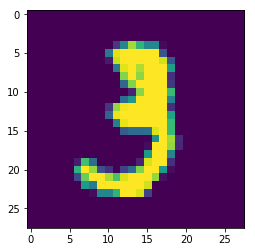

In [27]:
plt.imshow(np.squeeze(x_train[10]))
print(y_train[10])

In [16]:
input_shape = (28,28,1)
batch_size = 128
epochs = 12

def net(input_shape, num_classes=10):
    in_ = tf.keras.Input(input_shape)
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(in_)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    out_ = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs=in_,outputs=out_)

model = net(input_shape)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
__________

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0504 - acc: 0.98 - ETA: 13s - loss: 0.1103 - acc: 0.96 - ETA: 13s - loss: 0.0983 - acc: 0.96 - ETA: 13s - loss: 0.1153 - acc: 0.96 - ETA: 13s - loss: 0.1209 - acc: 0.96 - ETA: 13s - loss: 0.1286 - acc: 0.96 - ETA: 13s - loss: 0.1285 - acc: 0.96 - ETA: 13s - loss: 0.1204 - acc: 0.96 - ETA: 13s - loss: 0.1226 - acc: 0.96 - ETA: 13s - loss: 0.1176 - acc: 0.96 - ETA: 12s - loss: 0.1161 - acc: 0.96 - ETA: 12s - loss: 0.1137 - acc: 0.96 - ETA: 12s - loss: 0.1101 - acc: 0.97 - ETA: 12s - loss: 0.1088 - acc: 0.97 - ETA: 12s - loss: 0.1094 - acc: 0.97 - ETA: 12s - loss: 0.1077 - acc: 0.97 - ETA: 12s - loss: 0.1085 - acc: 0.97 - ETA: 12s - loss: 0.1103 - acc: 0.97 - ETA: 12s - loss: 0.1104 - acc: 0.97 - ETA: 12s - loss: 0.1082 - acc: 0.97 - ETA: 12s - loss: 0.1089 - acc: 0.97 - ETA: 12s - loss: 0.1073 - acc: 0.97 - ETA: 12s - loss: 0.1065 - acc: 0.97 - ETA: 12s - loss: 0.1074 - acc: 0.97 - ETA: 12s - loss: 0.1059 - acc: 0.97 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0872 - acc: 0.974 - ETA: 1s - loss: 0.0872 - acc: 0.974 - ETA: 0s - loss: 0.0871 - acc: 0.974 - ETA: 0s - loss: 0.0871 - acc: 0.974 - ETA: 0s - loss: 0.0874 - acc: 0.974 - ETA: 0s - loss: 0.0876 - acc: 0.974 - ETA: 0s - loss: 0.0875 - acc: 0.974 - ETA: 0s - loss: 0.0878 - acc: 0.974 - ETA: 0s - loss: 0.0878 - acc: 0.974 - ETA: 0s - loss: 0.0878 - acc: 0.974 - ETA: 0s - loss: 0.0880 - acc: 0.974 - ETA: 0s - loss: 0.0877 - acc: 0.974 - ETA: 0s - loss: 0.0879 - acc: 0.974 - ETA: 0s - loss: 0.0880 - acc: 0.974 - ETA: 0s - loss: 0.0883 - acc: 0.974 - ETA: 0s - loss: 0.0883 - acc: 0.974 - ETA: 0s - loss: 0.0883 - acc: 0.974 - ETA: 0s - loss: 0.0882 - acc: 0.974 - ETA: 0s - loss: 0.0880 - acc: 0.974 - 14s 234us/step - loss: 0.0880 - acc: 0.9745 - val_loss: 0.0411 - val_acc: 0.9860
Epoch 3/12
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0427 - acc: 0.98 - ETA: 13s - loss: 0.0435 - acc: 0.98 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0481 - acc: 0.98 - ETA: 13s - loss: 0.0657 - acc: 0.98 - ETA: 13s - loss: 0.0697 - acc: 0.97 - ETA: 13s - loss: 0.0576 - acc: 0.98 - ETA: 13s - loss: 0.0490 - acc: 0.98 - ETA: 13s - loss: 0.0537 - acc: 0.98 - ETA: 12s - loss: 0.0550 - acc: 0.98 - ETA: 12s - loss: 0.0572 - acc: 0.98 - ETA: 12s - loss: 0.0608 - acc: 0.98 - ETA: 12s - loss: 0.0577 - acc: 0.98 - ETA: 12s - loss: 0.0604 - acc: 0.98 - ETA: 12s - loss: 0.0599 - acc: 0.98 - ETA: 12s - loss: 0.0596 - acc: 0.98 - ETA: 12s - loss: 0.0579 - acc: 0.98 - ETA: 12s - loss: 0.0583 - acc: 0.98 - ETA: 12s - loss: 0.0571 - acc: 0.98 - ETA: 12s - loss: 0.0589 - acc: 0.98 - ETA: 12s - loss: 0.0572 - acc: 0.98 - ETA: 12s - loss: 0.0578 - acc: 0.98 - ETA: 12s - loss: 0.0574 - acc: 0.98 - ETA: 12s - loss: 0.0563 - acc: 0.98 - ETA: 12s - loss: 0.0557 - acc: 0.98 - ETA: 12s - loss: 0.0556 - acc: 0.98 - ETA: 12s - loss: 0.0546 - acc: 0.98 - ETA: 12s - loss: 0.0571 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0550 - acc: 0.984 - ETA: 1s - loss: 0.0553 - acc: 0.984 - ETA: 0s - loss: 0.0554 - acc: 0.984 - ETA: 0s - loss: 0.0554 - acc: 0.984 - ETA: 0s - loss: 0.0554 - acc: 0.984 - ETA: 0s - loss: 0.0554 - acc: 0.984 - ETA: 0s - loss: 0.0554 - acc: 0.984 - ETA: 0s - loss: 0.0553 - acc: 0.984 - ETA: 0s - loss: 0.0551 - acc: 0.984 - ETA: 0s - loss: 0.0550 - acc: 0.984 - ETA: 0s - loss: 0.0551 - acc: 0.984 - ETA: 0s - loss: 0.0551 - acc: 0.984 - ETA: 0s - loss: 0.0552 - acc: 0.984 - ETA: 0s - loss: 0.0553 - acc: 0.984 - ETA: 0s - loss: 0.0552 - acc: 0.984 - ETA: 0s - loss: 0.0551 - acc: 0.984 - ETA: 0s - loss: 0.0550 - acc: 0.984 - ETA: 0s - loss: 0.0549 - acc: 0.984 - ETA: 0s - loss: 0.0549 - acc: 0.984 - 14s 234us/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.0320 - val_acc: 0.9891
Epoch 5/12
54912/60000 [==========================>...] - ETA: 14s - loss: 0.1232 - acc: 0.97 - ETA: 13s - loss: 0.0952 - acc: 0.97 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0087 - acc: 1.00 - ETA: 13s - loss: 0.0102 - acc: 0.99 - ETA: 13s - loss: 0.0214 - acc: 0.99 - ETA: 13s - loss: 0.0307 - acc: 0.99 - ETA: 13s - loss: 0.0374 - acc: 0.98 - ETA: 13s - loss: 0.0461 - acc: 0.98 - ETA: 13s - loss: 0.0478 - acc: 0.98 - ETA: 12s - loss: 0.0463 - acc: 0.98 - ETA: 12s - loss: 0.0440 - acc: 0.98 - ETA: 12s - loss: 0.0444 - acc: 0.98 - ETA: 12s - loss: 0.0441 - acc: 0.98 - ETA: 12s - loss: 0.0460 - acc: 0.98 - ETA: 12s - loss: 0.0436 - acc: 0.98 - ETA: 12s - loss: 0.0419 - acc: 0.98 - ETA: 12s - loss: 0.0406 - acc: 0.98 - ETA: 12s - loss: 0.0398 - acc: 0.98 - ETA: 12s - loss: 0.0403 - acc: 0.98 - ETA: 12s - loss: 0.0392 - acc: 0.98 - ETA: 12s - loss: 0.0374 - acc: 0.98 - ETA: 12s - loss: 0.0374 - acc: 0.98 - ETA: 12s - loss: 0.0384 - acc: 0.98 - ETA: 12s - loss: 0.0376 - acc: 0.98 - ETA: 12s - loss: 0.0383 - acc: 0.98 - ETA: 12s - loss: 0.0389 - acc: 0.98 - ETA: 12s - loss: 0.0386 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0414 - acc: 0.986 - ETA: 1s - loss: 0.0415 - acc: 0.987 - ETA: 0s - loss: 0.0415 - acc: 0.986 - ETA: 0s - loss: 0.0415 - acc: 0.986 - ETA: 0s - loss: 0.0417 - acc: 0.986 - ETA: 0s - loss: 0.0418 - acc: 0.986 - ETA: 0s - loss: 0.0417 - acc: 0.986 - ETA: 0s - loss: 0.0421 - acc: 0.986 - ETA: 0s - loss: 0.0420 - acc: 0.986 - ETA: 0s - loss: 0.0420 - acc: 0.986 - ETA: 0s - loss: 0.0421 - acc: 0.986 - ETA: 0s - loss: 0.0422 - acc: 0.986 - ETA: 0s - loss: 0.0421 - acc: 0.986 - ETA: 0s - loss: 0.0421 - acc: 0.986 - ETA: 0s - loss: 0.0420 - acc: 0.986 - ETA: 0s - loss: 0.0420 - acc: 0.987 - ETA: 0s - loss: 0.0419 - acc: 0.987 - ETA: 0s - loss: 0.0419 - acc: 0.987 - ETA: 0s - loss: 0.0421 - acc: 0.987 - 14s 236us/step - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0336 - val_acc: 0.9894
Epoch 7/12
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0223 - acc: 0.99 - ETA: 13s - loss: 0.0323 - acc: 0.98 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0574 - acc: 0.98 - ETA: 13s - loss: 0.0652 - acc: 0.98 - ETA: 13s - loss: 0.0488 - acc: 0.98 - ETA: 13s - loss: 0.0485 - acc: 0.98 - ETA: 13s - loss: 0.0439 - acc: 0.98 - ETA: 13s - loss: 0.0399 - acc: 0.98 - ETA: 13s - loss: 0.0418 - acc: 0.98 - ETA: 13s - loss: 0.0399 - acc: 0.98 - ETA: 12s - loss: 0.0405 - acc: 0.98 - ETA: 12s - loss: 0.0385 - acc: 0.98 - ETA: 12s - loss: 0.0398 - acc: 0.98 - ETA: 12s - loss: 0.0382 - acc: 0.98 - ETA: 12s - loss: 0.0394 - acc: 0.98 - ETA: 12s - loss: 0.0393 - acc: 0.98 - ETA: 12s - loss: 0.0375 - acc: 0.98 - ETA: 12s - loss: 0.0376 - acc: 0.98 - ETA: 12s - loss: 0.0360 - acc: 0.98 - ETA: 12s - loss: 0.0349 - acc: 0.98 - ETA: 12s - loss: 0.0338 - acc: 0.98 - ETA: 12s - loss: 0.0372 - acc: 0.98 - ETA: 12s - loss: 0.0374 - acc: 0.98 - ETA: 12s - loss: 0.0364 - acc: 0.98 - ETA: 12s - loss: 0.0365 - acc: 0.98 - ETA: 12s - loss: 0.0357 - acc: 0.98 - ETA: 12s - loss: 0.0346 - acc: 0.98 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0339 - acc: 0.989 - ETA: 1s - loss: 0.0340 - acc: 0.989 - ETA: 0s - loss: 0.0340 - acc: 0.989 - ETA: 0s - loss: 0.0341 - acc: 0.989 - ETA: 0s - loss: 0.0340 - acc: 0.989 - ETA: 0s - loss: 0.0340 - acc: 0.989 - ETA: 0s - loss: 0.0339 - acc: 0.989 - ETA: 0s - loss: 0.0340 - acc: 0.989 - ETA: 0s - loss: 0.0339 - acc: 0.989 - ETA: 0s - loss: 0.0338 - acc: 0.989 - ETA: 0s - loss: 0.0337 - acc: 0.989 - ETA: 0s - loss: 0.0336 - acc: 0.989 - ETA: 0s - loss: 0.0339 - acc: 0.989 - ETA: 0s - loss: 0.0338 - acc: 0.989 - ETA: 0s - loss: 0.0338 - acc: 0.989 - ETA: 0s - loss: 0.0338 - acc: 0.989 - ETA: 0s - loss: 0.0337 - acc: 0.989 - ETA: 0s - loss: 0.0336 - acc: 0.989 - ETA: 0s - loss: 0.0335 - acc: 0.989 - 14s 234us/step - loss: 0.0334 - acc: 0.9899 - val_loss: 0.0274 - val_acc: 0.9907
Epoch 9/12
54912/60000 [==========================>...] - ETA: 13s - loss: 0.0046 - acc: 1.00 - ETA: 13s - loss: 0.0120 - acc: 0.99 - ETA: 13s - loss:

54912/60000 [==========================>...] - ETA: 13s - loss: 0.0215 - acc: 0.99 - ETA: 13s - loss: 0.0460 - acc: 0.98 - ETA: 13s - loss: 0.0475 - acc: 0.98 - ETA: 13s - loss: 0.0402 - acc: 0.98 - ETA: 13s - loss: 0.0394 - acc: 0.98 - ETA: 13s - loss: 0.0355 - acc: 0.98 - ETA: 13s - loss: 0.0351 - acc: 0.98 - ETA: 13s - loss: 0.0352 - acc: 0.98 - ETA: 13s - loss: 0.0342 - acc: 0.98 - ETA: 12s - loss: 0.0325 - acc: 0.98 - ETA: 12s - loss: 0.0339 - acc: 0.98 - ETA: 12s - loss: 0.0334 - acc: 0.98 - ETA: 12s - loss: 0.0317 - acc: 0.98 - ETA: 12s - loss: 0.0306 - acc: 0.98 - ETA: 12s - loss: 0.0297 - acc: 0.98 - ETA: 12s - loss: 0.0289 - acc: 0.98 - ETA: 12s - loss: 0.0298 - acc: 0.99 - ETA: 12s - loss: 0.0293 - acc: 0.99 - ETA: 12s - loss: 0.0289 - acc: 0.98 - ETA: 12s - loss: 0.0280 - acc: 0.99 - ETA: 12s - loss: 0.0272 - acc: 0.99 - ETA: 12s - loss: 0.0268 - acc: 0.99 - ETA: 12s - loss: 0.0270 - acc: 0.99 - ETA: 12s - loss: 0.0261 - acc: 0.99 - ETA: 12s - loss: 0.0258 - acc: 0.99 - ETA

60000/60000 [==============================] - ETA: 1s - loss: 0.0294 - acc: 0.990 - ETA: 1s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0296 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0294 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0296 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0297 - acc: 0.990 - ETA: 0s - loss: 0.0298 - acc: 0.990 - ETA: 0s - loss: 0.0297 - acc: 0.990 - ETA: 0s - loss: 0.0296 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0295 - acc: 0.990 - ETA: 0s - loss: 0.0297 - acc: 0.990 - 14s 235us/step - loss: 0.0296 - acc: 0.9909 - val_loss: 0.0274 - val_acc: 0.9914
Epoch 11/12
57088/60000 [===========================>..] - ETA: 13s - loss: 0.0198 - acc: 0.99 - ETA: 13s - loss: 0.0327 - acc: 0.99 - ETA: 13s - loss

KeyboardInterrupt: 

In [18]:
# Try to use the functional API
#tf.reset_default_graph()
def net2(inputs_shapes, emb_size=4):
    images_shape = inputs_shapes
    input_image = tf.keras.Input(images_shape,name='image_input')
    x = tf.keras.layers.Conv2D(32,(3, 3), activation='relu')(input_image)
    x = tf.keras.layers.Conv2D(64,(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    out = tf.keras.layers.Dense(10,activation='softmax', name='out')(x)
    return tf.keras.Model(inputs=input_image, outputs=out)

w, h = SIZE
inputs_shapes = (w, h, 1)
model = net2(inputs_shapes)
model.compile(tf.keras.optimizers.Adadelta(),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())
print(x_train.shape)
model.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
__________

KeyboardInterrupt: 

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
__________

### Train it

In [68]:
# Check the inputs
print("Train inputs:")
print(images_train)
print(labels_train)
print(issame_train_in)

print("Train outputs")
print(labels_train_out)
print(issame_train_in)

print("Valid inputs")
print(pairs)
print(labels_valid)
print(issame_in)

print("Valid outputs")
print(labels_valid_out)
print(issame_in)

Train inputs:
[[[[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  ...

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]]


 [[[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.99609375]
   [-0.99609375]]

  [[-0.99609375]
   [-0.99609375]
   [-0.99609375]
   ...
   [-0.99609375]
   [-0.9960937

   [-0.99609375]]]]
[7 2 1 ... 4 5 6]
[0 0 1 ... 0 1 1]
Valid outputs
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 0 1 1]


In [25]:
model.fit(
    #[images_train,issame_train_in],
    [images_train,labels_train,issame_train_in],
    #[labels_train,issame_train_out],
    #[labels_train,issame_train_out],
    [labels_train_out,issame_train_in],
    epochs=20,
    batch_size=1024,
    validation_data = ([pairs,labels_valid,issame_in], [labels_valid_out,issame_in]),
    #validation_data = ([images_valid,issame_in], labels_valid)
    #validation_data=([images_valid,labels_valid,issame_in],[labels_valid,issame_out])
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='../output/logs/')]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


ValueError: can only convert an array of size 1 to a Python scalar

In [42]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 98, 98, 10)   280         image_input[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 49, 49, 10)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 47, 47, 20)   1820        max_pooling2d[0][0]              
__________________________________________________________________________________________________
max_poolin

### Test it on the training/validation dataset to stop the worst examples

In [45]:
labels_predict,_=model.predict([images_train[0:10],labels_train[0:10],issame_train_in[0:10]])

c:\users\guillaume\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


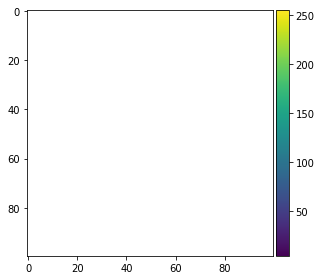

In [47]:
import skimage as sk
sk.io.imshow(images_train[0])

In [46]:
labels_predict[0]

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [97]:
predict = model.predict([images_test[0:1],labels_test[0:1],issame_in[0:1]])
predict

array([[0.6868594, 0.7891156]], dtype=float32)

### Evaluate it on the test dataset: one shot learning